### **1. Grilla de cálculo (Stencil)**

Asocie cada uno de los siguientes *stencils* a su correspondiente esquema de cálculo:

![1](images/1.png)

**(A)**
$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c\frac{u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}}{(\Delta x)^2} = 0 \quad (1)$$

**(B)**
$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c\frac{u_i^{n+1} - u_{i-1}^{n+1}}{\Delta x} = 0 \quad (2)$$

**(C)**
$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c\frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 \quad (3)$$

**(D)**
$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c\frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x} = 0 \quad (4)$$

## 🔹 Contexto general

Estamos en el mundo de la **ingeniería numérica** y las **ecuaciones en derivadas parciales (EDPs)**.
Muchas leyes físicas (flujo de calor, vibraciones, ondas, tráfico de autos, fluidos, etc.) se expresan en ecuaciones diferenciales que involucran:

* Derivadas en el **tiempo** ($t$)
* Derivadas en el **espacio** ($x$)

El problema: esas ecuaciones casi nunca tienen solución exacta.
La solución: usamos **métodos numéricos** → dividir el espacio y el tiempo en una **grilla (o malla)** y aproximar las derivadas con diferencias finitas.

Lo que aparece ahí es la representación de **cómo aproximamos derivadas** usando puntos vecinos de la malla.

* En la grilla:

  * El eje horizontal ($x$) son los **puntos espaciales** ($x_{i-1}, x_i, x_{i+1}$)
  * El eje vertical ($n, n+1$) son los **pasos en el tiempo**

El círculo en rojo indica **qué punto estamos calculando** (ejemplo: $u_i^{n+1}$)
y las flechas muestran **qué valores usamos para calcularlo** (sus vecinos en espacio y/o tiempo).

👉 Esto se llama **stencil** (plantilla).
Cada stencil corresponde a una **fórmula numérica** para aproximar una derivada.

---


### ¿Por qué hacemos esto?

Porque necesitamos reemplazar derivadas continuas ($\frac{\partial u}{\partial t}, \frac{\partial^2 u}{\partial x^2}, \ldots$) por **fórmulas discretas** que la computadora pueda calcular.

Ejemplo:

$$
\frac{\partial u}{\partial x} \approx \frac{u_{i}^n - u_{i-1}^n}{\Delta x}
$$

Esto significa: la derivada en $x_i$ se calcula restando el valor de la izquierda al valor en el mismo punto.

---

* Una flecha desde un punto en la línea `n` a la línea `n+1` indica dependencia del valor conocido $u^n$ en la actualización de $u^{n+1}$.
* Flechas que vienen de los nodos en la línea `n` (abajo) → esquema explícito en el espacio (usa valores en $t^n$).
* Flechas que vienen de nodos en la línea `n+1` (arriba) → esquema implícito (usa valores a $t^{n+1}$).

Ahora comparo con las fórmulas dadas:

(1) $\displaystyle\frac{u_i^{\,n+1}-u_i^{\,n}}{\Delta t}+c\frac{u_{i+1}^{\,n+1}-2u_i^{\,n+1}+u_{i-1}^{\,n+1}}{(\Delta x)^2}=0$
→ usa vecinos en $n+1$ (implícito, segundo derivado en espacio).

(2) $\displaystyle\frac{u_i^{\,n+1}-u_i^{\,n}}{\Delta t}+c\frac{u_i^{\,n}-u_{i-1}^{\,n}}{\Delta x}=0$
→ usa sólo $u_i^n$ y $u_{i-1}^n$ (dos puntos en la línea $n$: backward/“upwind” en espacio).

(3) $\displaystyle\frac{u_i^{\,n+1}-u_i^{\,n}}{\Delta t}+c\frac{u_{i+1}^{\,n+1}-u_{i-1}^{\,n+1}}{2\Delta x}=0$
→ usa los vecinos en $n+1$ (implícito, diferencia centrada en espacio evaluada en $n+1$).

(4) $\displaystyle\frac{u_i^{\,n+1}-u_i^{\,n}}{\Delta t}+c\frac{u_{i+1}^{\,n}-u_{i-1}^{\,n}}{2\Delta x}=0$
→ usa los tres puntos en $n$ (explicito, diferencia centrada en espacio).

Comparando con los stencils:

* (A) muestra flechas que salen de $u_i^n$ y $u_{i-1}^n$ hacia $u_i^{\,n+1}$ → corresponde exactamente a (2).

* (B) muestra flechas de los tres puntos $u_{i-1}^n,\;u_i^n,\;u_{i+1}^n$ hacia $u_i^{\,n+1}$ → corresponde a (4).

* (C) muestra dependencia de los vecinos en la línea $n+1$ (flechas curvas desde $u_{i-1}^{\,n+1}$ y $u_{i+1}^{\,n+1}$) además de la vertical que vincula $u_i^{\,n}$ con $u_i^{\,n+1}$ (la derivada temporal). Eso es un esquema **implícito** con diferencias centradas en el espacio a la nueva capa temporal → corresponde a (3).

(La ecuación (1) también es implícita pero contiene la segunda derivada espacial $(u_{i+1}^{n+1}-2u_i^{n+1}+u_{i-1}^{n+1})/(\Delta x)^2$; ese esquema pediría resolver un sistema con la laplaciana en $n+1$. No es el trazado que muestran A/B — el stencil C representa el caso (3), derivada espacial centrada en $n+1$.)

### Resultado final (asociación)

* **(A)** ↔ **(2)**
* **(B)** ↔ **(4)**
* **(C)** ↔ **(3)**

### Comentario adicional (fórmulas en forma iterativa)

* (2) (A, upwind backward): $\;u_i^{n+1}=u_i^n-\dfrac{c\,\Delta t}{\Delta x}\,(u_i^n-u_{i-1}^n)$.
* (4) (B, FTCS centrada explícita): $\;u_i^{n+1}=u_i^n-\dfrac{c\,\Delta t}{2\Delta x}\,(u_{i+1}^n-u_{i-1}^n)$.
* (3) (C, implícita centrada): $\;u_i^{n+1}+\dfrac{c\Delta t}{2\Delta x}\big(u_{i+1}^{n+1}-u_{i-1}^{n+1}\big)=u_i^n$ — es implícita y requiere resolver un sistema lineal para la capa $n+1$.

### 📌 Traducción de los esquemas

1. (Ecuación 1): usa $u^{n+1}$ y vecinos espaciales en $n+1$ → esto corresponde a una **aproximación implícita con segunda derivada espacial** (difusión).
2. (Ecuación 2): usa $u^{n+1}_i$ y $u^n_i, u^n_{i-1}$ → es **adelante en tiempo, atrás en espacio (FTBS)**, típico de la **ecuación de advección**.
3. (Ecuación 3): usa promedio central en espacio en $n+1$ → es **implícito centrado**.
4. (Ecuación 4): usa promedio central en espacio en $n$ → es **explícito centrado (FTCS)**.

---

## 🔹 ¿Qué representa físicamente?

Estos esquemas sirven para **simular fenómenos reales**:

* **Conducción de calor** en una barra (ecuación de difusión).
* **Propagación de ondas** (ecuación de ondas).
* **Movimiento de autos en una autopista** (ecuación de advección, justo el tema que después ves en el flujo de tráfico 🚗🚙🚕).

En otras palabras: lo que estamos haciendo es a **traducir derivadas a operaciones de resta/suma en una grilla** → la base de **todas las simulaciones por computadora** en ingeniería y física.

---

## 🔹 Conexión con lo demás

1. **Ejercicio 1 (stencil):** Aprender a escribir diferencias finitas (la “gramática”).
2. **Ejercicio 2 (estabilidad):** No todos los esquemas funcionan: si eliges mal $\Delta t$, la solución explota → aquí aparece la famosa **condición CFL**.
3. **Ejercicio 3 (SymPy):** Practicar con derivadas simbólicas y algebra (para manipular fórmulas más complicadas).
4. **Ejercicio 4 (flujo de tráfico):** Aplicar todo lo anterior a un modelo real → simular densidad de autos, velocidades y atascos.

---

En **métodos numéricos para ecuaciones en derivadas parciales (EDP)**, las aproximaciones se pueden clasificar principalmente según **cómo se aproximan las derivadas en el tiempo y en el espacio**. No hay un número fijo, pero las más comunes se dividen así:

---

## **1️⃣ Según el tiempo**

1. **Explícitas (Forward in Time, FT)**

   * Usan solo valores conocidos del tiempo $n$ para calcular el siguiente paso $n+1$.
   * **Ventaja:** fáciles de implementar.
   * **Desventaja:** pueden ser inestables si el paso temporal $\Delta t$ es grande.

2. **Implícitas (Backward in Time, BT)**

   * Involucran valores desconocidos en el tiempo $n+1$ (a veces requieren resolver un sistema de ecuaciones).
   * **Ventaja:** más estables, permiten pasos grandes.
   * **Desventaja:** más costosas computacionalmente.

3. **Crank-Nicolson (promedio tiempo n y n+1)**

   * Aproximación semi-implícita: promedio de valores en $n$ y $n+1$.
   * Combina precisión y estabilidad.

---

## **2️⃣ Según el espacio**

1. **Diferencias hacia adelante (Forward in Space, FDS)**

   $$
   \frac{\partial u}{\partial x} \approx \frac{u_{i+1} - u_i}{\Delta x}
   $$

2. **Diferencias hacia atrás (Backward in Space, BDS)**

   $$
   \frac{\partial u}{\partial x} \approx \frac{u_i - u_{i-1}}{\Delta x}
   $$

3. **Diferencias centradas (Central Difference, CDS)**

   $$
   \frac{\partial u}{\partial x} \approx \frac{u_{i+1} - u_{i-1}}{2 \Delta x}
   $$

   * Segunda derivada:

   $$
   \frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i-1} - 2u_i + u_{i+1}}{\Delta x^2}
   $$

---

## **3️⃣ Combinaciones típicas de esquemas**

| Tiempo          | Espacio | Nombre         | Tipo de ecuación                               |
| --------------- | ------- | -------------- | ---------------------------------------------- |
| Explícito $n$   | Central | FTCS           | Difusión, advección (condicionalmente estable) |
| Explícito $n$   | Atrás   | FTBS           | Advección (estabilidad CFL)                    |
| Implícito $n+1$ | Central | BTCS           | Difusión, advección (estable)                  |
| Semi-implícito  | Central | Crank-Nicolson | Difusión, advección (estable y preciso)        |

---

💡 **Resumen conceptual**:

* **Explícito:** calculas el futuro solo con el presente.
* **Implícito:** necesitas resolver un sistema porque el futuro depende del futuro mismo.
* **Centrado:** más preciso en espacio, menos dispersivo.
* **Adelante/atrás:** simples, pero menos precisos, pueden ser inestables.

---


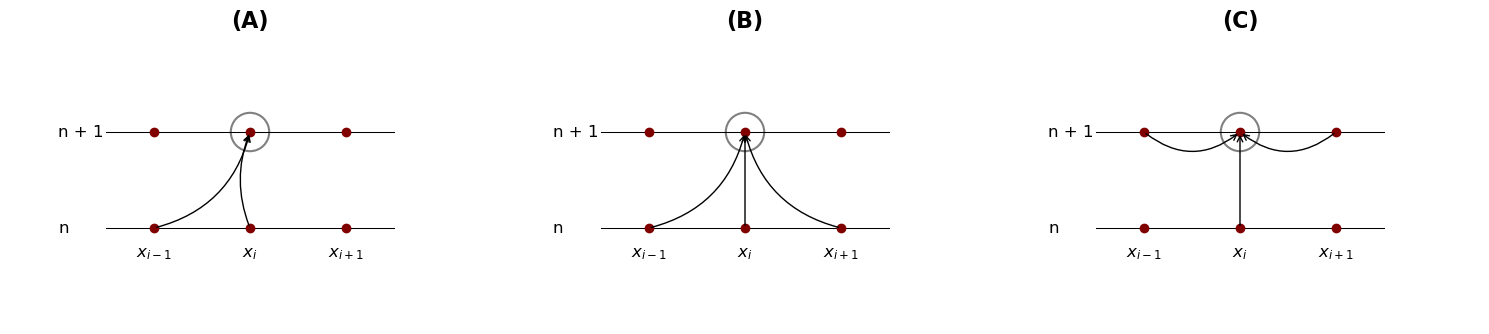

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def setup_plot(ax, title):
    """Configura las propiedades básicas de un subplot para el stencil."""
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_xlim(-1.5, 3.5)
    ax.set_ylim(-1, 2)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off') # Oculta los ejes y el marco

def draw_grid_and_labels(ax):
    """Dibuja la grilla base y las etiquetas para un stencil."""
    # Coordenadas de los puntos
    x_coords = [0, 1, 2]
    y_n = 0
    y_n1 = 1

    # Líneas de tiempo
    ax.plot([-0.5, 2.5], [y_n, y_n], 'k-', lw=0.75)
    ax.plot([-0.5, 2.5], [y_n1, y_n1], 'k-', lw=0.75)

    # Puntos de la grilla
    for x in x_coords:
        ax.plot(x, y_n, 'o', color='maroon', markersize=6)
        ax.plot(x, y_n1, 'o', color='maroon', markersize=6)

    # Etiquetas de tiempo
    ax.text(-1, y_n, 'n', fontsize=12, va='center')
    ax.text(-1, y_n1, 'n + 1', fontsize=12, va='center')

    # Etiquetas espaciales
    ax.text(x_coords[0], y_n - 0.3, r'$x_{i-1}$', fontsize=12, ha='center')
    ax.text(x_coords[1], y_n - 0.3, r'$x_{i}$', fontsize=12, ha='center')
    ax.text(x_coords[2], y_n - 0.3, r'$x_{i+1}$', fontsize=12, ha='center')
    
    # Círculo en el punto de cálculo principal
    circle = plt.Circle((x_coords[1], y_n1), 0.2, color='gray', fill=False, lw=1.5)
    ax.add_artist(circle)

def draw_stencil_A(ax):
    """Dibuja el stencil (A)"""
    setup_plot(ax, '(A)')
    draw_grid_and_labels(ax)
    
    # Flechas de dependencia
    arrow_props = dict(arrowstyle="->", color="black", connectionstyle="arc3,rad=0.3")
    ax.annotate("", xy=(1, 1), xytext=(0, 0), arrowprops=arrow_props)
    arrow_props['connectionstyle'] = "arc3,rad=-0.2"
    ax.annotate("", xy=(1, 1), xytext=(1, 0), arrowprops=arrow_props)

def draw_stencil_B(ax):
    """Dibuja el stencil (B)"""
    setup_plot(ax, '(B)')
    draw_grid_and_labels(ax)

    # Flechas de dependencia
    arrow_props = dict(arrowstyle="->", color="black")
    ax.annotate("", xy=(1, 1), xytext=(0, 0), arrowprops={**arrow_props, 'connectionstyle': "arc3,rad=0.3"})
    ax.annotate("", xy=(1, 1), xytext=(1, 0), arrowprops={**arrow_props, 'connectionstyle': "arc3,rad=0"})
    ax.annotate("", xy=(1, 1), xytext=(2, 0), arrowprops={**arrow_props, 'connectionstyle': "arc3,rad=-0.3"})

def draw_stencil_C(ax):
    """Dibuja el stencil (C)"""
    setup_plot(ax, '(C)')
    draw_grid_and_labels(ax)

    # Flechas de dependencia
    arrow_props = dict(arrowstyle="->", color="black")
    ax.annotate("", xy=(1, 1), xytext=(1, 0), arrowprops=arrow_props)
    ax.annotate("", xy=(1, 1), xytext=(0, 1), arrowprops={**arrow_props, 'connectionstyle': "arc3,rad=0.4"})
    ax.annotate("", xy=(1, 1), xytext=(2, 1), arrowprops={**arrow_props, 'connectionstyle': "arc3,rad=-0.4"})


# Crear la figura principal con 3 subplots en una fila
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Dibujar cada stencil en su respectivo subplot
draw_stencil_A(ax1)
draw_stencil_B(ax2)
draw_stencil_C(ax3)

# Ajustar el espaciado y mostrar la gráfica
plt.tight_layout()
plt.show()

### 1. La Clave: Entendiendo la Notación

Primero, lo más importante es entender qué significa cada término. Pensemos en $u_i^n$ como la "dirección" de un punto en la grilla:

* **El subíndice `i` indica la posición en el espacio** (en el eje x).
* **El superíndice `n` indica la posición en el tiempo** (en el eje vertical).

Entonces:
* $u_i^n$ es el valor en el punto `(i, n)` del presente.
* $u_i^{n+1}$ es el valor en el punto `(i, n+1)`, es decir, el **futuro** que queremos calcular.
* $u_{i-1}^n$ es el valor en el punto `(i-1, n)`, el vecino de la **izquierda** en el presente.
* $u_{i+1}^n$ es el valor en el punto `(i+1, n)`, el vecino de la **derecha** en el presente.

---

### 2. Cómo se Construye la Ecuación desde la Malla

Para pasar de la malla a la ecuación, "traducimos" las derivadas de una ecuación diferencial (como la del calor o de ondas) a aproximaciones usando los puntos de la malla. Estas son las "piezas" más comunes:

#### **Aproximación de la Derivada en el Tiempo $\frac{\partial u}{\partial t}$**
Casi siempre se usa una **diferencia hacia adelante**. Mide el cambio desde el presente (`n`) hacia el futuro (`n+1`) en la misma posición `i`.

* **Visualmente**: Una flecha vertical que va de $u_i^n$ a $u_i^{n+1}$.
* **Fórmula**: $$\frac{\partial u}{\partial t} \approx \frac{u_i^{n+1} - u_i^n}{\Delta t}$$
    * Este término aparece en las **cuatro ecuaciones** que mostraste.

#### **Aproximación de la 1ª Derivada en el Espacio $\frac{\partial u}{\partial x}$**
Aquí hay tres sabores, dependiendo de qué vecinos uses:

1.  **Diferencia hacia atrás (Backward)**: Usa el punto actual `i` y el de la izquierda `i-1`.
    * **Visualmente**: Involucra los puntos $u_i^n$ y $u_{i-1}^n$.
    * **Fórmula**: $$\frac{\partial u}{\partial x} \approx \frac{u_i^n - u_{i-1}^n}{\Delta x}$$

2.  **Diferencia hacia adelante (Forward)**: Usa el punto de la derecha `i+1` y el actual `i`.
    * **Visualmente**: Involucra los puntos $u_{i+1}^n$ y $u_i^n$.
    * **Fórmula**: $$\frac{\partial u}{\partial x} \approx \frac{u_{i+1}^n - u_i^n}{\Delta x}$$

3.  **Diferencia Central (Central)**: Usa los dos vecinos, `i-1` e `i+1`. Es más precisa.
    * **Visualmente**: Involucra los puntos $u_{i+1}^n$ y $u_{i-1}^n$.
    * **Fórmula**: $$\frac{\partial u}{\partial x} \approx \frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x}$$

#### **Aproximación de la 2ª Derivada en el Espacio $\frac{\partial^2 u}{\partial x^2}$**
Esta es muy común en problemas de difusión (como el calor) y casi siempre usa una **diferencia central** que involucra a los tres puntos: `i-1`, `i` e `i+1`.

* **Visualmente**: Involucra los tres puntos $u_{i-1}^n, u_i^n, u_{i+1}^n$.
* **Fórmula**: $$\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{(\Delta x)^2}$$

---





### 3. Asociando tus Mallas con las Ecuaciones

Ahora, apliquemos esto a tu imagen. La clave es ver de dónde vienen las flechas. El punto que **recibe** las flechas es el que se está calculando (el lado izquierdo de la ecuación, $u_i^{n+1}$), y los puntos de donde **salen** las flechas son los que se usan en el cálculo (el lado derecho).

#### **Stencil (A) → Ecuación (2)**
1.  **¿Qué punto se calcula?** El punto $(i, n+1)$, que corresponde a $u_i^{n+1}$.
2.  **¿Qué puntos se usan?** Las flechas vienen de $(i, n)$ y $(i-1, n)$. Estos son $u_i^n$ y $u_{i-1}^n$.
3.  **¿Qué "piezas" podemos construir?**
    * Derivada en tiempo: Con $u_i^{n+1}$ y $u_i^n$ formamos $\frac{u_i^{n+1} - u_i^n}{\Delta t}$.
    * Derivada en espacio: Con $u_i^n$ y $u_{i-1}^n$ formamos una **diferencia hacia atrás**: $\frac{u_i^n - u_{i-1}^n}{\Delta x}$.
4.  **Conclusión**: Si unes estas piezas, obtienes la **Ecuación (2)**. Este es un **esquema explícito**, porque el futuro ($n+1$) se calcula solo con valores del presente ($n$).

#### **Stencil (B) → Ecuación (4)**
1.  **¿Qué punto se calcula?** El punto $(i, n+1) \implies u_i^{n+1}$.
2.  **¿Qué puntos se usan?** Las flechas vienen de $(i-1, n)$, $(i, n)$, y $(i+1, n)$. Estos son $u_{i-1}^n$, $u_i^n$, y $u_{i+1}^n$.
3.  **¿Qué "piezas" podemos construir?**
    * Derivada en tiempo: $\frac{u_i^{n+1} - u_i^n}{\Delta t}$.
    * Derivada en espacio: Usando los vecinos $u_{i+1}^n$ y $u_{i-1}^n$ podemos formar una **diferencia central para la primera derivada**: $\frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x}$.
4.  **Conclusión**: Al combinar estas piezas, obtienes la **Ecuación (4)**. También es un **esquema explícito**.

#### **Stencil (C) → Ecuación (1)**
Este es un caso especial y muy importante.

1.  **¿Qué punto se calcula?** El punto $(i, n+1) \implies u_i^{n+1}$.
2.  **¿Qué puntos se usan?** ¡Cuidado aquí! Una flecha viene del presente $(i, n)$, pero las otras dos vienen de sus vecinos en el **mismo nivel de tiempo futuro**, $(i-1, n+1)$ y $(i+1, n+1)$.
3.  **¿Qué "piezas" podemos construir?**
    * Derivada en tiempo: $\frac{u_i^{n+1} - u_i^n}{\Delta t}$.
    * Derivada en espacio: Se usa una diferencia central para la **segunda derivada**, pero con los puntos del futuro: $\frac{u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}}{(\Delta x)^2}$.
4.  **Conclusión**: Esto corresponde exactamente a la **Ecuación (1)**. Como el cálculo de $u_i^{n+1}$ depende de otros valores desconocidos en el nivel $n+1$, se llama un **esquema implícito**. Requiere resolver un sistema de ecuaciones.

### En Resumen

| Stencil | Dependencia | Tipo de Esquema | Ecuación Correspondiente |
| :---: | :--- | :--- | :---: |
| **(A)** | $u_i^{n+1}$ depende de $u_i^n, u_{i-1}^n$ | Explícito (Upwind) | **(2)** |
| **(B)** | $u_i^{n+1}$ depende de $u_{i-1}^n, u_i^n, u_{i+1}^n$ | Explícito (Diferencia Central) | **(4)** |
| **(C)** | $u_i^{n+1}$ depende de $u_i^n$ y de vecinos en $n+1$ | Implícito (Crank-Nicolson/BTCS) | **(1)** |

La **Ecuación (3)** es otro esquema implícito para la primera derivada, pero no corresponde a ninguno de los stencils dibujados.